# GPs w. Uncertain Inputs

In [65]:
import os, sys
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.insert(0, parent_dir) 

import numpy as np
from uncertain import UnscentedGPR, UnscentedSGPR, UncertainSGPR
import GPy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 1.0
input_noise = .3
n_train = 500
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)

X += input_noise * rng.randn(X.shape[0], X.shape[1])
y += noise * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]
X_plot += input_noise * rng.randn(X_plot.shape[0], X_plot.shape[1])
X_plot = np.sort(X_plot, axis=0)

In [67]:
def plot_results(title=None):
    # Plot results
    plt.figure(figsize=(10, 5))
    lw = 2
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

    plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
             label='GPR' )
    plt.fill_between(X_plot[:, 0], 
                     (y_gpr - 2*y_std).squeeze(), 
                     (y_gpr + 2*y_std).squeeze(), color='darkorange',
                     alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.xlim(0, 20)
    plt.ylim(-4, 4)
    if title is not None:
        plt.title(title)
    plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
    plt.show()

## Regular GP v.s. Unscented GP

### No Uncertainty in the Predictive Variance

In [70]:
X_variance = input_noise
n_restarts = 0
verbose = None
gpr_clf = UnscentedGPR(
    verbose=verbose, 
    n_restarts=n_restarts, 
    X_variance=X_variance
)

gpr_clf.fit(X, y);

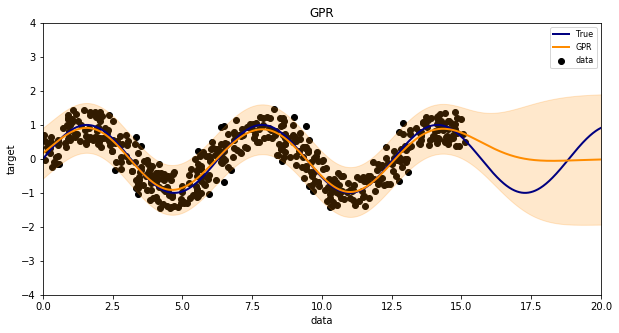

In [71]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False, unscented=False)
plot_results('GPR')

### Uncertainty in the Predictve Variance

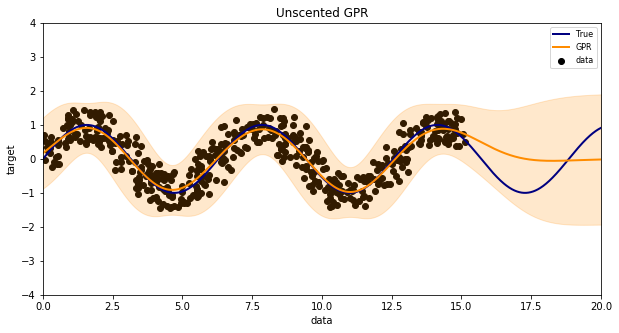

In [72]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False, unscented=True)
plot_results('Unscented GPR')

## Sparse GPR vs Unscented Sparse GPR

In [73]:
n_inducing = 10
inference = 'vfe'
X_variance = input_noise
verbose = 0
max_iters = 1_000
n_restarts = 0


gpr_clf = UnscentedSGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

### Standard Predictive Uncertainty

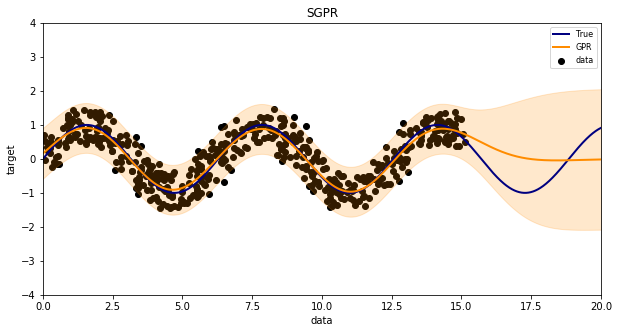

In [74]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False, unscented=False)
plot_results('SGPR')

### Unscented Predictive Variance

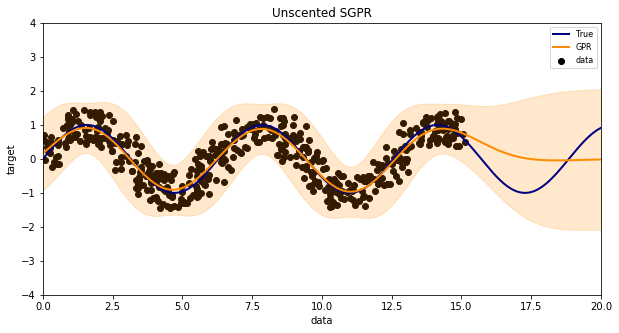

In [76]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False, unscented=True)
plot_results('Unscented SGPR')

### Variational Sparse GP with Input Uncertainty

In [80]:
n_inducing = 10
inference = 'vfe'
X_variance = input_noise
verbose = 0
max_iters = 1_000
n_restarts = 0


gpr_clf = UncertainSGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

{'inducing': <matplotlib.collections.PathCollection at 0x14085a4e0>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x14085a898>],
 'input_error': [<ErrorbarContainer object of 3 artists>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x14085a780>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x144161550>]}

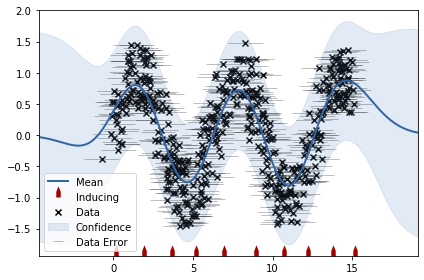

In [81]:
gpr_clf.gp_model.plot()

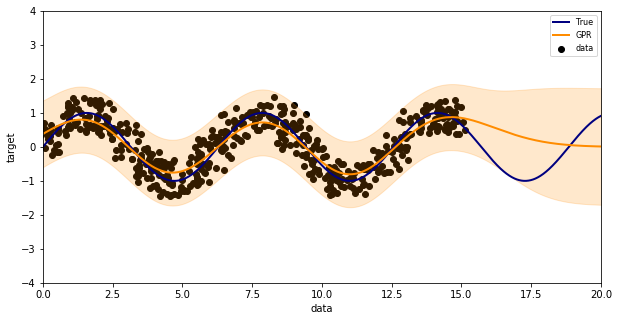

In [82]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()